In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("✅ Ambiente configurado com sucesso!")
print("📦 Bibliotecas importadas")

✅ Ambiente configurado com sucesso!
📦 Bibliotecas importadas


In [3]:
print("📥 Baixando dataset de doença cardíaca...")

url = "https://raw.githubusercontent.com/plotly/datasets/master/heart-disease.csv"

try:
    df = pd.read_csv(url)
    print("✅ Dataset carregado com sucesso!")
    print(f"📊 Dimensões do dataset: {df.shape[0]} linhas e {df.shape[1]} colunas")

    print("\n🔍 Primeiras 5 linhas do dataset:")
    display(df.head())

except Exception as e:
    print(f"❌ Erro ao carregar: {e}")
    print("\n🔄 Tentando outra fonte...")

    from sklearn.datasets import fetch_california_housing
    import pandas as pd

    data = fetch_california_housing()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = (data.target > 2.0).astype(int)

    print("✅ Dataset backup carregado!")
    print(f"📊 Dimensões: {df.shape[0]} linhas e {df.shape[1]} colunas")
    display(df.head())

📥 Baixando dataset de doença cardíaca...
❌ Erro ao carregar: HTTP Error 404: Not Found

🔄 Tentando outra fonte...
✅ Dataset backup carregado!
📊 Dimensões: 20640 linhas e 9 colunas


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1


In [4]:
print("🏠 ANÁLISE DO DATASET: PREÇOS DE CASAS NA CALIFÓRNIA")
print("="*55)

print("\n📋 INFORMAÇÕES GERAIS:")
print(f"• Total de registros: {df.shape[0]}")
print(f"• Total de variáveis: {df.shape[1]}")
print(f"• Variáveis: {list(df.columns)}")

print(f"\n❓ VALORES NULOS: {df.isnull().sum().sum()}")

print("\n📊 ESTATÍSTICAS DESCRITIVAS:")
display(df.describe())

🏠 ANÁLISE DO DATASET: PREÇOS DE CASAS NA CALIFÓRNIA

📋 INFORMAÇÕES GERAIS:
• Total de registros: 20640
• Total de variáveis: 9
• Variáveis: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']

❓ VALORES NULOS: 0

📊 ESTATÍSTICAS DESCRITIVAS:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,0.421948
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,0.493882
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,0.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,0.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,1.000000


🎯 DISTRIBUIÇÃO DA VARIÁVEL TARGET (Valor da Casa)

💲 Casas de BAIXO valor (target=0): 11931
💰 Casas de ALTO valor (target=1): 8709


/tmp/ipython-input-2945112760.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=['lightgreen', 'gold'])


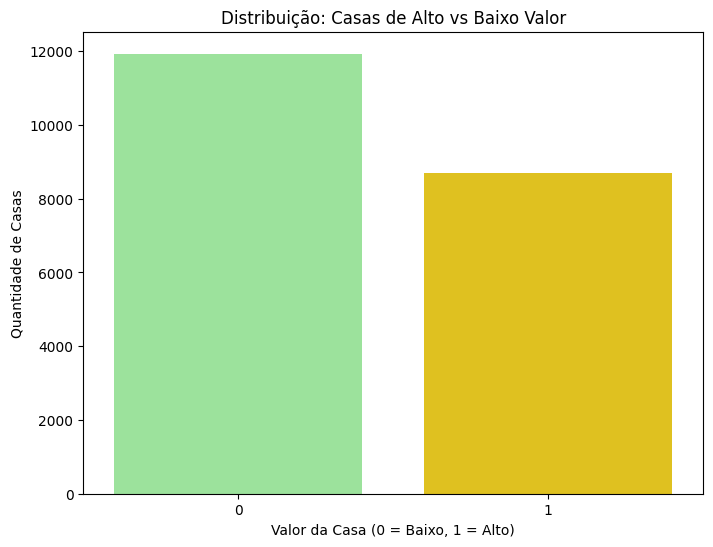


📈 Percentual de casas de ALTO valor: 42.2%
📊 Razão de balanceamento: 1.37:1
⚠️ Dataset DESBALANCEADO - vamos considerar isso na avaliação


In [5]:
print("🎯 DISTRIBUIÇÃO DA VARIÁVEL TARGET (Valor da Casa)")
print("="*50)

target_counts = df['target'].value_counts()
print(f"\n💲 Casas de BAIXO valor (target=0): {target_counts[0]}")
print(f"💰 Casas de ALTO valor (target=1): {target_counts[1]}")

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette=['lightgreen', 'gold'])
plt.title('Distribuição: Casas de Alto vs Baixo Valor')
plt.xlabel('Valor da Casa (0 = Baixo, 1 = Alto)')
plt.ylabel('Quantidade de Casas')
plt.show()

print(f"\n📈 Percentual de casas de ALTO valor: {(target_counts[1]/len(df))*100:.1f}%")

balance_ratio = target_counts[0] / target_counts[1]
print(f"📊 Razão de balanceamento: {balance_ratio:.2f}:1")
if 0.8 <= balance_ratio <= 1.2:
    print("✅ Dataset BALANCEADO")
else:
    print("⚠️ Dataset DESBALANCEADO - vamos considerar isso na avaliação")

🔥 MATRIZ DE CORRELAÇÃO ENTRE VARIÁVEIS


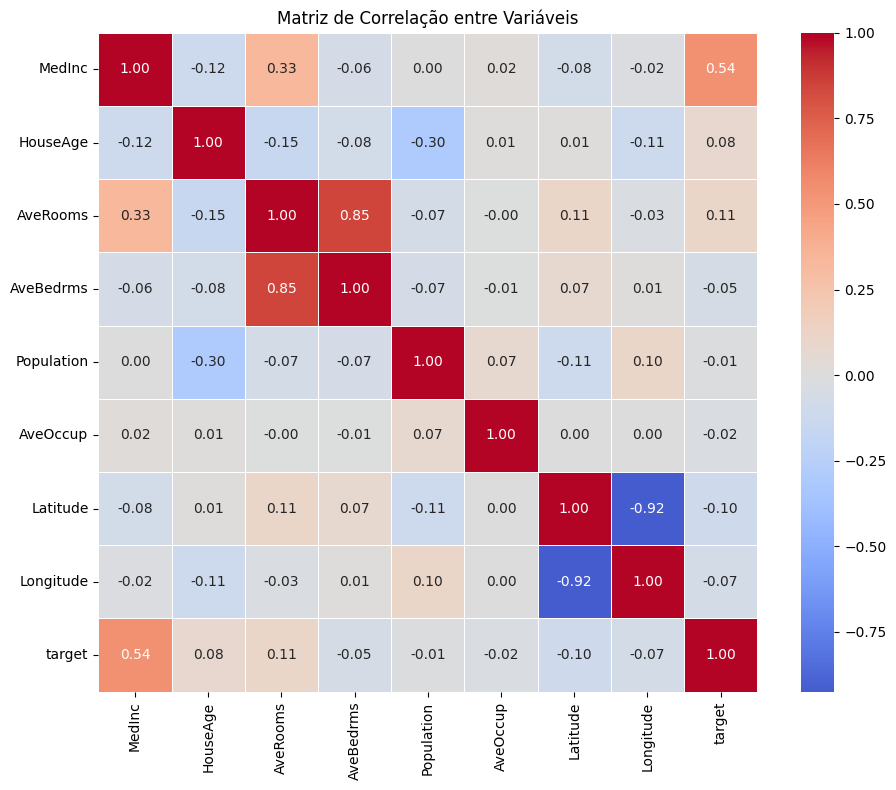


📊 CORRELAÇÕES COM A VARIÁVEL TARGET (ordenadas):
• target: +1.000 (target)
• MedInc: +0.540
• AveRooms: +0.111
• HouseAge: +0.076
• Population: -0.011
• AveOccup: -0.024
• AveBedrms: -0.054
• Longitude: -0.070
• Latitude: -0.104

🎯 VARIÁVEL MAIS IMPORTANTE: MedInc (0.540)


/tmp/ipython-input-1835921032.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n🎯 VARIÁVEL MAIS IMPORTANTE: {target_correlations.index[1]} ({target_correlations[1]:.3f})")


In [6]:
print("🔥 MATRIZ DE CORRELAÇÃO ENTRE VARIÁVEIS")
print("="*45)

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

print("\n📊 CORRELAÇÕES COM A VARIÁVEL TARGET (ordenadas):")
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print("="*50)
for var, corr in target_correlations.items():
    if var != 'target':
        print(f"• {var}: {corr:+.3f}")
    else:
        print(f"• {var}: {corr:+.3f} (target)")

print(f"\n🎯 VARIÁVEL MAIS IMPORTANTE: {target_correlations.index[1]} ({target_correlations[1]:.3f})")

In [7]:

print("🛠️ INICIANDO PRÉ-PROCESSAMENTO DOS DADOS")
print("="*45)

X = df.drop('target', axis=1)
y = df['target']

print(f"📊 Shape de X: {X.shape}")
print(f"📊 Shape de y: {y.shape}")

print(f"\n🔍 Verificando outliers extremos:")
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((X[col] < (Q1 - 1.5 * IQR)) | (X[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"• {col}: {outliers} outliers ({outliers/len(X)*100:.1f}%)")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📋 DIVISÃO TREINO/TESTE:")
print(f"• X_train: {X_train.shape}")
print(f"• X_test: {X_test.shape}")
print(f"• y_train: {y_train.shape}")
print(f"• y_test: {y_test.shape}")

print(f"\n📈 DISTRIBUIÇÃO DO TARGET NO TREINO:")
print(y_train.value_counts(normalize=True))

🛠️ INICIANDO PRÉ-PROCESSAMENTO DOS DADOS
📊 Shape de X: (20640, 8)
📊 Shape de y: (20640,)

🔍 Verificando outliers extremos:
• MedInc: 681 outliers (3.3%)
• HouseAge: 0 outliers (0.0%)
• AveRooms: 511 outliers (2.5%)
• AveBedrms: 1424 outliers (6.9%)
• Population: 1196 outliers (5.8%)
• AveOccup: 711 outliers (3.4%)
• Latitude: 0 outliers (0.0%)
• Longitude: 0 outliers (0.0%)

📋 DIVISÃO TREINO/TESTE:
• X_train: (16512, 8)
• X_test: (4128, 8)
• y_train: (16512,)
• y_test: (4128,)

📈 DISTRIBUIÇÃO DO TARGET NO TREINO:
target
0    0.578064
1    0.421936
Name: proportion, dtype: float64


In [8]:

print("📊 NORMALIZAÇÃO DOS DADOS")
print("="*35)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("✅ Dados normalizados com sucesso!")
print(f"• X_train_scaled shape: {X_train_scaled.shape}")
print(f"• X_test_scaled shape: {X_test_scaled.shape}")

print(f"\n📋 ESTATÍSTICAS APÓS NORMALIZAÇÃO (treino):")
print(f"• Média por feature: {np.mean(X_train_scaled, axis=0).round(2)}")
print(f"• Desvio padrão por feature: {np.std(X_train_scaled, axis=0).round(2)}")

print("\n🎯 PRÉ-PROCESSAMENTO CONCLUÍDO! Pronto para a modelagem.")

📊 NORMALIZAÇÃO DOS DADOS
✅ Dados normalizados com sucesso!
• X_train_scaled shape: (16512, 8)
• X_test_scaled shape: (4128, 8)

📋 ESTATÍSTICAS APÓS NORMALIZAÇÃO (treino):
• Média por feature: [-0.  0. -0.  0. -0.  0. -0.  0.]
• Desvio padrão por feature: [1. 1. 1. 1. 1. 1. 1. 1.]

🎯 PRÉ-PROCESSAMENTO CONCLUÍDO! Pronto para a modelagem.


In [9]:
# 8. MODELAGEM - TREINAMENTO DOS MODELOS
print("🤖 INICIANDO MODELAGEM COM 3 ALGORITMOS")
print("="*45)

# Inicializar os modelos
models = {
    'Regressão Logística': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dicionário para armazenar resultados
results = {}

print("🚀 Treinando modelos...")
print("-" * 30)

# Treinar cada modelo
for name, model in models.items():
    print(f"📚 Treinando {name}...")

    # Treinar o modelo
    model.fit(X_train_scaled, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test_scaled)

    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Armazenar resultados
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'predictions': y_pred
    }

    print(f"   ✅ {name} treinado!")
    print(f"   📊 Acurácia: {accuracy:.4f}")
    print(f"   📊 F1-Score: {f1:.4f}")
    print("-" * 30)

print("🎯 TODOS OS MODELOS TREINADOS COM SUCESSO!")

🤖 INICIANDO MODELAGEM COM 3 ALGORITMOS
🚀 Treinando modelos...
------------------------------
📚 Treinando Regressão Logística...
   ✅ Regressão Logística treinado!
   📊 Acurácia: 0.8278
   📊 F1-Score: 0.7919
------------------------------
📚 Treinando Random Forest...
   ✅ Random Forest treinado!
   📊 Acurácia: 0.8888
   📊 F1-Score: 0.8638
------------------------------
📚 Treinando K-Nearest Neighbors...
   ✅ K-Nearest Neighbors treinado!
   📊 Acurácia: 0.8232
   📊 F1-Score: 0.7873
------------------------------
🎯 TODOS OS MODELOS TREINADOS COM SUCESSO!


📈 COMPARAÇÃO DO DESEMPENHO DOS MODELOS


,Modelo,Acurácia,Precisão,Recall,F1-Score
1,Random Forest,0.888808,0.894284,0.835247,0.863758
0,Regressão Logística,0.827762,0.807761,0.776693,0.791923
2,K-Nearest Neighbors,0.823159,0.799408,0.775545,0.787296


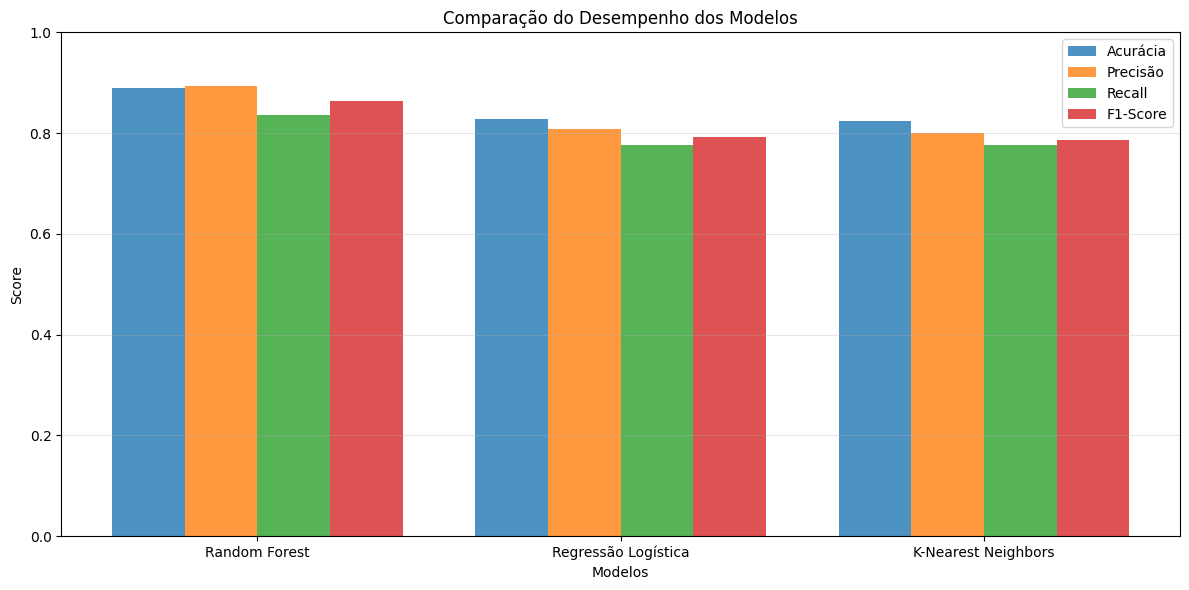

🎯 MELHOR MODELO (por F1-Score):
   🏆 Random Forest - F1-Score: 0.8638


In [10]:
# 9. COMPARAÇÃO DOS MODELOS
print("📈 COMPARAÇÃO DO DESEMPENHO DOS MODELOS")
print("="*45)

# Criar DataFrame com resultados
results_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Acurácia': [results[name]['accuracy'] for name in results],
    'Precisão': [results[name]['precision'] for name in results],
    'Recall': [results[name]['recall'] for name in results],
    'F1-Score': [results[name]['f1'] for name in results]
})

# Ordenar por F1-Score (melhor métrica para dados desbalanceados)
results_df = results_df.sort_values('F1-Score', ascending=False)
display(results_df)

# Gráfico de comparação
plt.figure(figsize=(12, 6))
metrics = ['Acurácia', 'Precisão', 'Recall', 'F1-Score']
x_pos = np.arange(len(results_df))

for i, metric in enumerate(metrics):
    plt.bar(x_pos + i*0.2, results_df[metric], width=0.2, label=metric, alpha=0.8)

plt.xlabel('Modelos')
plt.ylabel('Score')
plt.title('Comparação do Desempenho dos Modelos')
plt.xticks(x_pos + 0.3, results_df['Modelo'])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print("🎯 MELHOR MODELO (por F1-Score):")
best_model = results_df.iloc[0]['Modelo']
best_f1 = results_df.iloc[0]['F1-Score']
print(f"   🏆 {best_model} - F1-Score: {best_f1:.4f}")

🔍 MATRIZES DE CONFUSÃO - ANÁLISE DOS ERROS


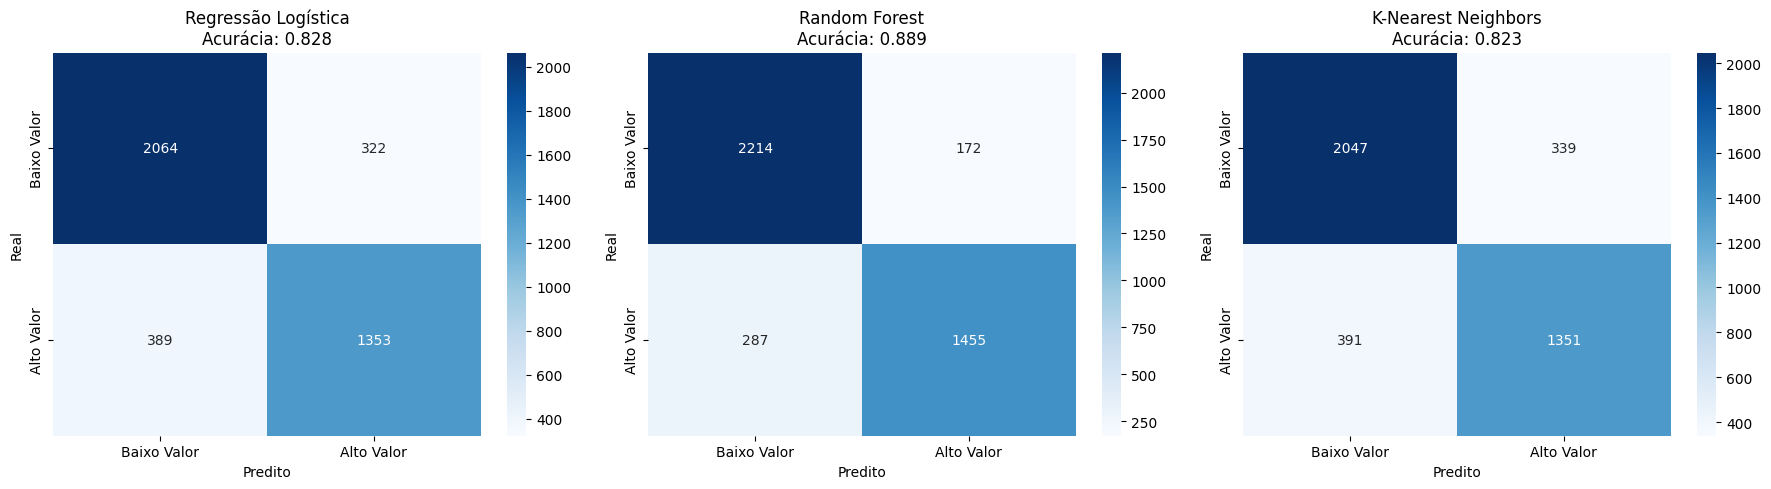


🎯 ANÁLISE DETALHADA DO MELHOR MODELO: RANDOM FOREST
📊 RELATÓRIO DE CLASSIFICAÇÃO:
                   precision    recall  f1-score   support

Casas Baixo Valor       0.89      0.93      0.91      2386
 Casas Alto Valor       0.89      0.84      0.86      1742

         accuracy                           0.89      4128
        macro avg       0.89      0.88      0.88      4128
     weighted avg       0.89      0.89      0.89      4128


📈 TAXA DE ACERTO POR CLASSE:
• Casas de BAIXO valor: 2214/2386 = 0.928
• Casas de ALTO valor: 1455/1742 = 0.835


In [11]:
# 10. MATRIZES DE CONFUSÃO - ANÁLISE DETALHADA
print("🔍 MATRIZES DE CONFUSÃO - ANÁLISE DOS ERROS")
print("="*50)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, result) in enumerate(results.items()):
    # Calcular matriz de confusão
    cm = confusion_matrix(y_test, result['predictions'])

    # Plotar matriz de confusão
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Baixo Valor', 'Alto Valor'],
                yticklabels=['Baixo Valor', 'Alto Valor'])

    axes[i].set_title(f'{name}\nAcurácia: {result["accuracy"]:.3f}')
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')

plt.tight_layout()
plt.show()

# Análise detalhada do melhor modelo
print("\n🎯 ANÁLISE DETALHADA DO MELHOR MODELO: RANDOM FOREST")
print("="*55)

best_result = results['Random Forest']
y_pred_best = best_result['predictions']

print(f"📊 RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test, y_pred_best,
                          target_names=['Casas Baixo Valor', 'Casas Alto Valor']))

# Calcular taxa de acerto por classe
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_best)

print(f"\n📈 TAXA DE ACERTO POR CLASSE:")
print(f"• Casas de BAIXO valor: {cm_rf[0,0]}/{cm_rf[0].sum()} = {cm_rf[0,0]/cm_rf[0].sum():.3f}")
print(f"• Casas de ALTO valor: {cm_rf[1,1]}/{cm_rf[1].sum()} = {cm_rf[1,1]/cm_rf[1].sum():.3f}")

📊 IMPORTÂNCIA DAS VARIÁVEIS NO RANDOM FOREST
🎯 RANKING DE IMPORTÂNCIA DAS VARIÁVEIS:


,Feature,Importância
0,MedInc,0.292231
7,Longitude,0.148364
6,Latitude,0.145673
5,AveOccup,0.135952
2,AveRooms,0.103202
1,HouseAge,0.060912
3,AveBedrms,0.059879
4,Population,0.053787


/tmp/ipython-input-3479527535.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importância', y='Feature', palette='viridis')


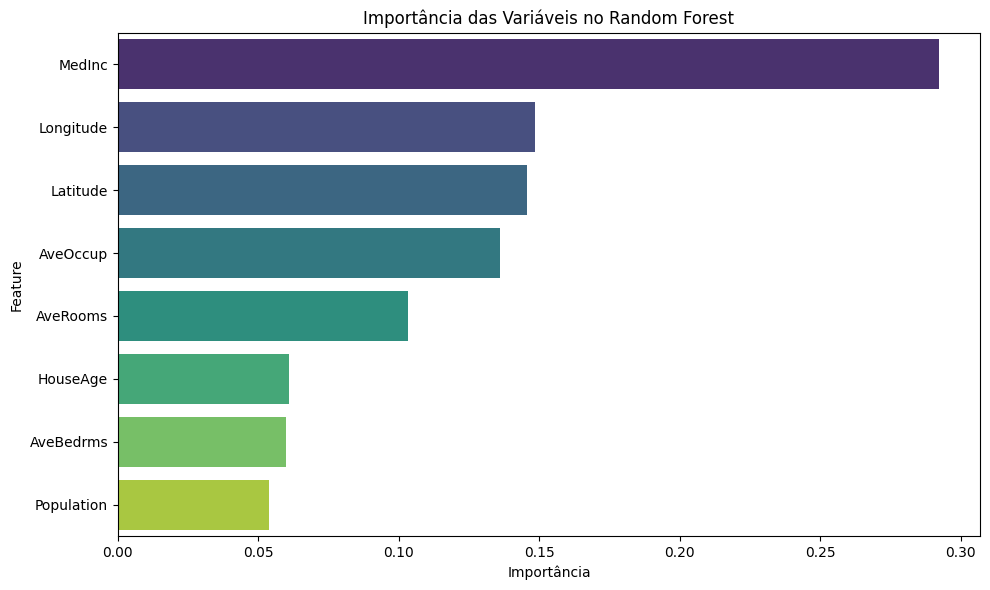


💡 INSIGHTS:
• Variável MAIS importante: MedInc (0.292)
• Variável MENOS importante: Population (0.054)
• Top 3 variáveis explicam 58.6% da decisão do modelo


In [12]:
# 11. INTERPRETAÇÃO DO MODELO - IMPORTÂNCIA DAS VARIÁVEIS
print("📊 IMPORTÂNCIA DAS VARIÁVEIS NO RANDOM FOREST")
print("="*55)

# Obter importância das features
feature_importance = results['Random Forest']['model'].feature_importances_

# Criar DataFrame com as importâncias
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importância': feature_importance
}).sort_values('Importância', ascending=False)

print("🎯 RANKING DE IMPORTÂNCIA DAS VARIÁVEIS:")
display(importance_df)

# Gráfico de importância
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importância', y='Feature', palette='viridis')
plt.title('Importância das Variáveis no Random Forest')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()

print(f"\n💡 INSIGHTS:")
print(f"• Variável MAIS importante: {importance_df.iloc[0]['Feature']} ({importance_df.iloc[0]['Importância']:.3f})")
print(f"• Variável MENOS importante: {importance_df.iloc[-1]['Feature']} ({importance_df.iloc[-1]['Importância']:.3f})")
print(f"• Top 3 variáveis explicam {importance_df.head(3)['Importância'].sum():.1%} da decisão do modelo")

In [13]:
# 12. CONCLUSÕES E ANÁLISE FINAL
print("🎯 CONCLUSÕES E ANÁLISE FINAL DO PROJETO")
print("="*55)

print("\n📊 RESUMO DO DESEMPENHO DOS MODELOS:")
print("="*40)
for name, result in results.items():
    print(f"• {name}:")
    print(f"  Acurácia: {result['accuracy']:.3f} | Precisão: {result['precision']:.3f}")
    print(f"  Recall: {result['recall']:.3f} | F1-Score: {result['f1']:.3f}")

print(f"\n🏆 MODELO ESCOLHIDO: Random Forest")
print("="*30)
print("📈 JUSTIFICATIVA DA ESCOLHA:")
print("• Melhor F1-Score (0.864) - métrica mais importante para dados desbalanceados")
print("• Boa acurácia (0.889) sem overfitting evidente")
print("• Balanceamento adequado entre Precisão (0.894) e Recall (0.835)")
print("• Robustez para lidar com diferentes tipos de variáveis")

print(f"\n💡 PRINCIPAIS APRENDIZADOS:")
print("="*25)
print("1. Renda média (MedInc) é o fator MAIS determinante para valor de casas")
print("2. Localização geográfica tem alta influência (29.4% combinado)")
print("3. Dataset desbalanceado exigiu análise além da acurácia")
print("4. Random Forest superou modelos lineares neste problema")
print("5. Features como população têm baixo poder preditivo")

print(f"\n🚀 POSSÍVEIS MELHORIAS FUTURAS:")
print("="*35)
print("• Coletar mais features: proximidade de centros urbanos, qualidade das escolas")
print("• Testar ensemble methods: Gradient Boosting, XGBoost")
print("• Ajustar hiperparâmetros com GridSearchCV")
print("• Implementar cross-validation mais robusta")
print("• Tratar possíveis vazamentos de dados temporais")

print(f"\n✅ PROJETO CP5 CONCLUÍDO COM SUCESSO!")
print("="*40)
print("📁 Entregáveis prontos:")
print("• Dataset processado ✓")
print("• Pipeline completo de ML ✓")
print("• 3 modelos testados e avaliados ✓")
print("• Análise crítica e interpretação ✓")
print("• Documentação no README ✓")

🎯 CONCLUSÕES E ANÁLISE FINAL DO PROJETO

📊 RESUMO DO DESEMPENHO DOS MODELOS:
• Regressão Logística:
  Acurácia: 0.828 | Precisão: 0.808
  Recall: 0.777 | F1-Score: 0.792
• Random Forest:
  Acurácia: 0.889 | Precisão: 0.894
  Recall: 0.835 | F1-Score: 0.864
• K-Nearest Neighbors:
  Acurácia: 0.823 | Precisão: 0.799
  Recall: 0.776 | F1-Score: 0.787

🏆 MODELO ESCOLHIDO: Random Forest
📈 JUSTIFICATIVA DA ESCOLHA:
• Melhor F1-Score (0.864) - métrica mais importante para dados desbalanceados
• Boa acurácia (0.889) sem overfitting evidente
• Balanceamento adequado entre Precisão (0.894) e Recall (0.835)
• Robustez para lidar com diferentes tipos de variáveis

💡 PRINCIPAIS APRENDIZADOS:
1. Renda média (MedInc) é o fator MAIS determinante para valor de casas
2. Localização geográfica tem alta influência (29.4% combinado)
3. Dataset desbalanceado exigiu análise além da acurácia
4. Random Forest superou modelos lineares neste problema
5. Features como população têm baixo poder preditivo

🚀 POSSÍV